In [1]:
import albumentations as alb

In [3]:
augmentor = alb.Compose(
[alb.RandomCrop(width=450, height=450),
alb.HorizontalFlip(p=0.5),
alb.RandomBrightnessContrast(p=0.2),
alb.RandomGamma(p=0.2),
alb.RGBShift(p=0.2),
alb.VerticalFlip(p=0.5)],
bbox_params = alb.BboxParams(
format = "albumentations",
label_fields=['class_labels']
))

In [26]:
import os
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

In [5]:
img = cv2.imread("data/train/images/4c4934c8-d523-11ec-b984-842b2bb3a5b6.jpg")

In [6]:
img

array([[[171, 175, 176],
        [168, 172, 173],
        [165, 170, 169],
        ...,
        [175, 179, 173],
        [209, 213, 207],
        [223, 227, 221]],

       [[145, 150, 149],
        [157, 162, 161],
        [164, 169, 168],
        ...,
        [203, 207, 201],
        [224, 228, 222],
        [213, 217, 211]],

       [[159, 164, 162],
        [165, 170, 168],
        [163, 168, 166],
        ...,
        [217, 221, 215],
        [211, 215, 210],
        [222, 226, 221]],

       ...,

       [[130, 130, 118],
        [125, 125, 113],
        [125, 123, 115],
        ...,
        [  1,   0,   2],
        [  1,   0,   2],
        [  1,   0,   2]],

       [[146, 146, 132],
        [132, 132, 120],
        [122, 120, 112],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[131, 132, 116],
        [129, 129, 115],
        [121, 119, 111],
        ...,
        [  0,   1,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [9]:
with open("data/train/labels/4c4934c8-d523-11ec-b984-842b2bb3a5b6.json", "r") as f:
    label = json.load(f)

In [10]:
label

{'version': '3.16.7',
 'flags': {},
 'shapes': [{'label': 'face',
   'line_color': None,
   'fill_color': None,
   'points': [[268.14814814814815, 63.44444444444443],
    [453.3333333333333, 284.18518518518516]],
   'shape_type': 'rectangle',
   'flags': {}}],
 'lineColor': [0, 255, 0, 128],
 'fillColor': [255, 0, 0, 128],
 'imagePath': '../images/4a2bbfd5-d523-11ec-a194-842b2bb3a5b6.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQA

In [11]:
label['shapes'][0]['points']

[[268.14814814814815, 63.44444444444443],
 [453.3333333333333, 284.18518518518516]]

In [12]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [13]:
coords # Pascal VOC Format

[268.14814814814815, 63.44444444444443, 453.3333333333333, 284.18518518518516]

In [14]:
img.shape

(480, 640, 3)

In [17]:
coords = list(np.divide(coords, [640,480,640,480]))

In [19]:
coords # Albumentations Format

[0.4189814814814815,
 0.1321759259259259,
 0.7083333333333333,
 0.5920524691358025]

In [28]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [22]:
augmented['image']

array([[[201, 207, 196],
        [176, 181, 172],
        [191, 196, 187],
        ...,
        [135, 139, 128],
        [134, 138, 127],
        [135, 139, 127]],

       [[196, 202, 191],
        [187, 192, 183],
        [209, 214, 205],
        ...,
        [134, 138, 127],
        [133, 137, 125],
        [134, 139, 124]],

       [[208, 214, 203],
        [202, 207, 198],
        [188, 193, 184],
        ...,
        [137, 141, 130],
        [136, 140, 128],
        [135, 140, 125]],

       ...,

       [[  1,   2,   0],
        [  1,   2,   0],
        [  1,   2,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  1,   2,   0],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  1,   2,   0],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [29]:
augmented['bboxes']

[(0.22255144032921811,
  0.4218106995884774,
  0.6340740740740739,
  0.9123456790123458)]

In [30]:
augmented['class_labels']

['face']

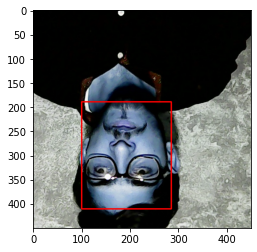

In [31]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

# Augmentation Pipeline

In [44]:
AUGMENTED_FOLDER = "aug_data"
if not os.path.exists(AUGMENTED_FOLDER):
    os.mkdir(AUGMENTED_FOLDER)
    
for fd in ['train', 'test', 'val']:
    folder_path = os.path.join(AUGMENTED_FOLDER, fd)
    if not os.path.exists(folder_path):
        os.mkdir(folder_path)
    
    for fd_pt in ["images", "labels"]:
        internal_path = os.path.join(folder_path, fd_pt)
        if not os.path.exists(internal_path):
            os.mkdir(internal_path)

In [42]:
for split_folder in ['train', 'test', 'val']:
    split_folder_path = os.path.join('data', split_folder)
    for image_name in os.listdir(os.path.join(split_folder_path, "images")):
        image_path = os.path.join(split_folder_path, "images", image_name)
        img = cv2.imread(image_path)
        
        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join(split_folder_path, "labels", image_name.split(".")[0]+".json")
        
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
                
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]

            coords = list(np.divide(coords, [img.shape[1], img.shape[0], img.shape[1], img.shape[0]]))

        
        try:
            for idx in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                
                save_image_path = os.path.join("aug_data",split_folder, "images", image_name.split(".")[0]+"_"+str(idx)+".jpg")
                save_label_path = os.path.join("aug_data",split_folder, "labels", image_name.split(".")[0]+"_"+str(idx)+".json")
                
                annotation = {}
                annotation['image'] = image_name
                cv2.imwrite(save_image_path, augmented['image'])
                
                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 
                    
                with open(save_label_path, 'w') as f:
                    json.dump(annotation, f)
                
        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.3263888888888889, 0.7448302469135801, 0.0023148148148148147, 0.3636574074074074, 'face'].
x_max is less than or equal to x_min for bbox [0.2789351851851852, 0.8142746913580247, 0.0011574074074074073, 0.3914351851851851, 'face'].
x_max is less than or equal to x_min for bbox [0.2685185185185185, 0.7525462962962962, 0.0023148148148148147, 0.38680555555555546, 'face'].
x_max is less than or equal to x_min for bbox [0.2650462962962963, 0.8266203703703704, 0.0011574074074074073, 0.41612654320987646, 'face'].
x_max is less than or equal to x_min for bbox [0.28587962962962965, 0.8405092592592591, 0.0023148148148148147, 0.32353395061728396, 'face'].
